In [ ]:
!pip install transformers

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
dataset = 'news'
nela_path = '/gdrive/MyDrive/ECE692:MisinformationProject/data/nela-gt-2020/'
dataset_path = 'news/'
bert_pretrained_model = 'bert-base-uncased'
len_tokens = []

In [4]:
from dataclasses import dataclass
from transformers import BertTokenizerFast
import torch
import json, os

tokenizer = BertTokenizerFast.from_pretrained(bert_pretrained_model)

@dataclass
class TokenizedText:
    __slots__ = ['id', 'source', 'title', 'content', 'label']
    id: str
    source: str
    title: str
    content: str
    label: int

class Dataset(torch.utils.data.dataset.Dataset):
    pass

class NelaGT(Dataset):
    pass

class NelaGT2020(NelaGT):
    _nela_path = '/gdrive/MyDrive/ECE692:MisinformationProject/data/nela-gt-2020/'
    _valid_subsets = ['news']

    def __init__(self, device, subset):

        if subset not in self._valid_subsets:
            raise ValueError(
                f"`{subset}` is not a valid subset. "
                f"Valid subsets are: {self._valid_subsets}"
            )

        torch.manual_seed(0)

        self._device = device
        self._subset = subset

        self._filename = self._nela_path + f'{subset}.txt'

        with open(self._nela_path + f'{subset}_offsets.json', 'r') as f:
            self._offsets = json.load(f)

    def __len__(self):
        return len(self._offsets)

    def __getitem__(self, index):
        with open(self._filename, 'r') as f:
            f.seek(self._offsets[str(index)], os.SEEK_SET)
            line = f.readline()
            label = int(line[0])
            text = line[2:]

        return (
            tokenizer(
                text, return_tensors="pt"
            )['input_ids'].to(self._device),
            torch.as_tensor([label], device=self._device)
        )

ds = NelaGT2020('cpu', 'news')        

Find length of tokens

In [ ]:
len_tokens = []
for i in range(len(ds)):
    tokens, label = ds[i]
    len_tokens.append(tokens.size()[1])
    # print(tokens.size()[1])
    # print(tokens)
    # print(label)
    # print(tokenizer.convert_ids_to_tokens(tokens[0]))
    
    

Plot histogram of frequency of token sizes

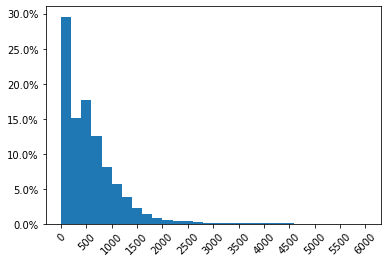

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

n_bins = 30
plt.hist(len_tokens, weights=np.ones(len(len_tokens)) / len(len_tokens), range=[0, 6000], bins=n_bins)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(0, 6001, 500), rotation=45)
plt.show()

In [ ]:
print(len(ds))

1272211
